# CPSC483-06 #
# Jupyter Notebook for dataset preprocessing of 'dreams' dataset #
Dulce Funez Chinchilla, Drashti Mehta, Erika Dickson


In [93]:
#Import statements
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
from sklearn import preprocessing


In [94]:
#Read the csv into a pandas dataframe and examine the raw dataset
dreams = pd.read_csv('dreams_dataset.csv')
print(dreams.shape)
dreams.head(10)

(21000, 21)


,dream_id,dreamer,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,friendliness_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,2IKA 4> Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000000,0.200000,0.200000,0.0,0.0
1,2,alta,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.666667,0.000000,0.0,1.0
2,3,alta,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",NaN,...,0.333333,0.000000,0.000000,0.285714,0.0,1.000000,0.428571,0.000000,0.0,1.0
3,4,alta,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA","1IKA 4> Q, 2ISA 4> 2ISA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000000,0.235294,0.117647,0.0,1.0
4,5,alta,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",D 4> Q,...,1.000000,0.000000,0.166667,0.166667,0.0,0.875000,1.333333,0.166667,0.0,1.0
5,6,alta,Alta: a detailed dreamer,1985?,en,Living next door to Loretta in an apartment - ...,"1FSA, 2ISA, 1FDA, 1IIC",HA 1FSA,D > 2IKA,NaN,...,0.000000,0.000000,0.000000,0.500000,0.0,1.000000,0.250000,0.000000,0.0,0.0
6,7,alta,Alta: a detailed dreamer,1985?,en,Kidnapped - I'm on my way somewhere else (by c...,"2ISA, 2IOA, 1IOA, 1ISA, 2IKA, 2ISA, 2ISA","AN 1ISA, AN D, SD 2ISA, AN D","Q > 2IKA, D > 2ISA, D > Q, 2IKA > D, D > Q, 1I...",NaN,...,0.000000,0.000000,0.142857,0.000000,0.0,1.000000,1.571429,0.000000,0.0,1.0
7,8,alta,Alta: a detailed dreamer,1985?,en,"I'm alone in an apartment - old place, inside ...","2ISA, 1ISA, 1ISA","AP D, SD D","D > D, 1MSA > D, 1MSA > D, D > 1MSA, D > D, D ...",D 4> D,...,0.000000,0.000000,0.000000,0.000000,0.0,0.888889,2.666667,0.333333,0.0,1.0
8,9,alta,Alta: a detailed dreamer,1985?,en,I'm somewhere with a friend I don't want to be...,"1IKA, stepfather, 1ISB, 1MSA",NaN,D > Q,NaN,...,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.250000,0.000000,0.0,0.0
9,10,alta,Alta: a detailed dreamer,1985?,en,"I am in some public place, reminds me of the g...","2ISA, 1MKA",NaN,NaN,NaN,...,1.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [95]:
#Add an additional column 'Gender' for the Gender of the dreamer, place it in index 2, intialize with 'n/a'
#Column 'Gender' will be used for data analysis and later conclusion drawing
dreams.insert(2, 'Gender', 'n/a')

In [96]:
#Update the Gender column to have dreamer Gender as numeric binary
#Female: 1
#Male: 0
dreamer_gender = {
    'alta' : '1',
    'angie' : '1',
    'arlie' : '1',
    'b' : '1',
    'b2' : '1',
    'bay_area_girls_456' : '1',
    'bay_area_girls_789' : '1',
    'bea1' : '1',
    'bea2' : '1',
    'blind-f' : '1',
    'blind-m' : '0',
    'bosnak' : '0',
    'chris' : '0',
    'chuck' : '0',
    'dahlia' : '1',
    'david' : '0',
    'dorothea' : '1',
    'ed' : '0',
    'edna' : '1',
    'elizabeth' : '1',
    'emma' : '1',
    'emmas_husband' : '0',
    'esther' : '1',
    'hall_female' : '1',
    'norms-f' : '1',
    'izzy' : '1',
    'jasmine1' : '1',
    'jasmine2' : '1',
    'jasmine3' : '1',
    'jasmine4' : '1',
    'jeff' : '0',
    'joan' : '1',
    'kenneth' : '0',
    'lawrence' : '0',
    'mack' : '0',
    'madeline1-hs' : '1',
    'madeline2-dorms' : '1',
    'madeline3-offcampus' : '1',
    'madeline4-postgrad' : '1',
    'mark' : '0',
    'melissa' : '1',
    'melora' : '1',
    'melvin' : '0',
    'merri' : '1',
    'miami-home' : '0',
    'miami-lab' : '0',
    'midwest_teens-f' : '1',
    'midwest_teens-m' : '0',
    'nancy' : '1',
    'natural_scientist' : '0',
    'norman' : '0',
    'wedding' : '1',
    'norms-m' : '0',
    'pegasus' : '0',
    'peru-f' : '1',
    'peru-m' : '0',
    'phil1' : '0',
    'phil2' : '0',
    'phil3' : '0',
    'physiologist' : '0',
    'ringo' : '0',
    'samantha' : '1',
    'seventh_graders' : '1',
    'toby' : '0',
    'tom' : '0',
    'ucsc_women' : '1',
    'vickie' : '1',
    'vietnam_vet' : '0',
    'vietnam_vet2' : '0',
    'west_coast_teens' : '1',
}

#Populate the df 'Gender'column with the transformed values
for key, val in dreamer_gender.items():
    dreams.loc[dreams['dreamer'] == key, 'Gender'] = val

dreams.head(5)

dreams['Gender'] = dreams['Gender'].astype(float)
dreams['Gender'].dtype



dtype('float64')

In [97]:
#Split train & test set with 80:20 ratio 
X = dreams.iloc[:, :-1]
y = dreams.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Make a copy of the raw train and test sets for later use
X_train_raw = X_train.copy()
y_train_raw = y_train.copy()
X_test_raw = X_test.copy()
y_test_raw = y_test.copy()


Proceed to data preprocessing on train set 

In [98]:
#Handle missing values: find how many columns have missing values, and how many many missing values
X_train.isna().sum()

 dream_id                      0
dreamer                        0
Gender                         0
description                    0
dream_date                     0
dream_language                 0
text_dream                     0
characters_code              373
emotions_code               7966
aggression_code             4456
friendliness_code           7828
sexuality_code             11665
Male                           0
Animal                         0
Friends                        0
Family                         0
Dead&Imaginary                 0
Aggression/Friendliness        0
A/CIndex                       0
F/CIndex                       0
S/CIndex                       0
dtype: int64

In [99]:
#Dimensionality reduction
#Remove unnecessary columns from the train set that are unusable or irrelevant
X_train.drop(' dream_id', axis=1, inplace=True)
X_train.drop('dream_language', axis=1, inplace=True)
X_train.drop('dream_date', axis=1, inplace=True)
X_train.drop('dreamer', axis=1, inplace=True)
X_train.drop('description', axis=1, inplace=True)
X_train.drop('text_dream', axis=1, inplace=True)

#Remove unnecessary/unusable columns with missing values 
X_train.drop('characters_code', axis=1, inplace=True)
X_train.drop('emotions_code', axis=1, inplace=True)
X_train.drop('aggression_code', axis=1, inplace=True)
X_train.drop('friendliness_code', axis=1, inplace=True)
X_train.drop('sexuality_code', axis=1, inplace=True)


In [100]:
#Checking none of the remaining columns have missing values
X_train.isna().sum()

Gender                     0
Male                       0
Animal                     0
Friends                    0
Family                     0
Dead&Imaginary             0
Aggression/Friendliness    0
A/CIndex                   0
F/CIndex                   0
S/CIndex                   0
dtype: int64

Discover & visualize the cleaned data to gain insights

In [101]:
#Discovering & ensuring that all the key feature columns are in the same range of values
print('Column "Aggression/Friendliness" minimum value:', X_train['Aggression/Friendliness'].min())
print('Column "Aggression/Friendliness" maximum value:', X_train['Aggression/Friendliness'].max())
print('Column "A/CIndex" minimum value:', X_train['A/CIndex'].min())
print('Column "A/CIndex" maximum value:', X_train['A/CIndex'].max())
print('Column "F/CIndex" minimum value:', X_train['F/CIndex'].min())
print('Column "F/CIndex" maximum value:', X_train['F/CIndex'].max())
print('Column "S/CIndex" minimum value:', X_train['S/CIndex'].min())
print('Column "S/CIndex" maximum value:', X_train['S/CIndex'].max())
print('Column "Male" minimum value:', X_train['Male'].min())
print('Column "Male" maximum value:', X_train['Male'].max())
print('Column "Animal" minimum value:', X_train['Animal'].min())
print('Column "Animal" maximum value:', X_train['Animal'].max())
print('Column "Friends" minimum value:', X_train['Friends'].min())
print('Column "Friends" maximum value:', X_train['Friends'].max())
print('Column "Family" minimum value:', X_train['Family'].min())
print('Column "Family" maximum value:', X_train['Family'].max())
print('Column "Dead&Imaginary" minimum value:', X_train['Dead&Imaginary'].min())
print('Column "Dead&Imaginary" maximum value:', X_train['Dead&Imaginary'].max())
print('Column "NegativeEmotions" minimum value:', y_train.min())
print('Column "NegativeEmotions" maximum value:', y_train.max())

Column "Aggression/Friendliness" minimum value: 0.0
Column "Aggression/Friendliness" maximum value: 1.0
Column "A/CIndex" minimum value: 0.0
Column "A/CIndex" maximum value: 10.0
Column "F/CIndex" minimum value: 0.0
Column "F/CIndex" maximum value: 11.0
Column "S/CIndex" minimum value: 0.0
Column "S/CIndex" maximum value: 8.0
Column "Male" minimum value: 0.0
Column "Male" maximum value: 1.0
Column "Animal" minimum value: 0.0
Column "Animal" maximum value: 1.0
Column "Friends" minimum value: 0.0
Column "Friends" maximum value: 1.0
Column "Family" minimum value: 0.0
Column "Family" maximum value: 1.0
Column "Dead&Imaginary" minimum value: 0.0
Column "Dead&Imaginary" maximum value: 1.0
Column "NegativeEmotions" minimum value: 0.0
Column "NegativeEmotions" maximum value: 1.0


In [102]:
#Need to scale within a range of 0-1: A/CIndex, F/CIndex, S/CIndex
scaler = preprocessing.MinMaxScaler()
X_train['A/CIndex'] = scaler.fit_transform(X_train[['A/CIndex']])
X_train['F/CIndex'] = scaler.fit_transform(X_train[['F/CIndex']])
X_train['S/CIndex'] = scaler.fit_transform(X_train[['S/CIndex']])

#Check that the data has been scaled between 0-1
print('Column "A/CIndex" minimum value:', X_train['A/CIndex'].min())
print('Column "A/CIndex" maximum value:', X_train['A/CIndex'].max())
print('Column "F/CIndex" minimum value:', X_train['F/CIndex'].min())
print('Column "F/CIndex" maximum value:', X_train['F/CIndex'].max())
print('Column "S/CIndex" minimum value:', X_train['S/CIndex'].min())
print('Column "S/CIndex" maximum value:', X_train['S/CIndex'].max())

X_train.head(10)

Column "A/CIndex" minimum value: 0.0
Column "A/CIndex" maximum value: 1.0
Column "F/CIndex" minimum value: 0.0
Column "F/CIndex" maximum value: 1.0
Column "S/CIndex" minimum value: 0.0
Column "S/CIndex" maximum value: 1.0


,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex
15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417
8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889
9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000
17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000
16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857
4475,1.0,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.150000,0.000000,0.000000
11744,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.100000,0.000000,0.250000
6056,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
3755,1.0,0.000000,0.000000,0.000000,0.200000,0.0,0.142857,0.040000,0.127273,0.125000
15650,1.0,0.600000,0.166667,0.200000,0.300000,0.0,0.625000,0.066667,0.022727,0.000000


Visualizing the data with scatterplots and histograms to determine relationships between the variables & target feature, and frequencies of the attributes

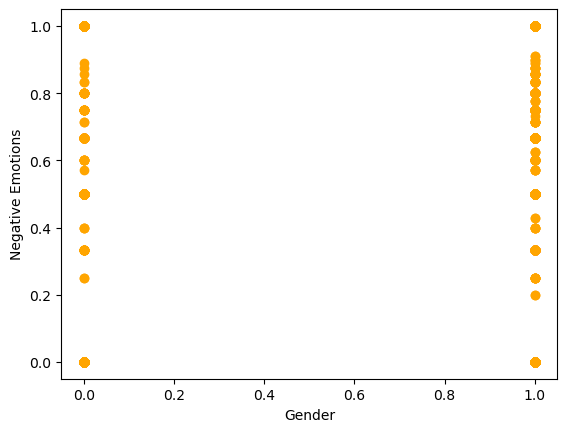

In [103]:
plt.xlabel("Gender")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Gender'], y_train, color = 'orange')
plt.show()

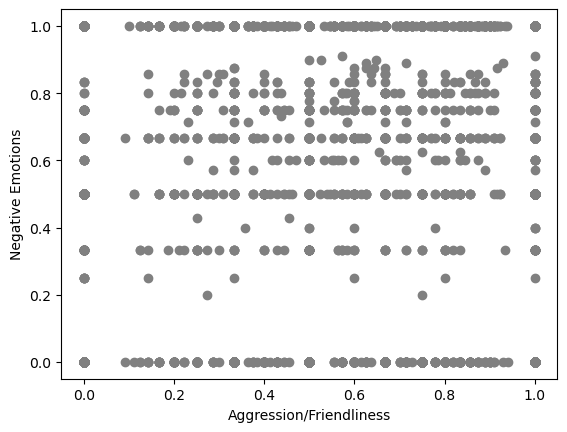

In [104]:
plt.xlabel("Aggression/Friendliness")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Aggression/Friendliness'], y_train, color = 'gray')
plt.show()

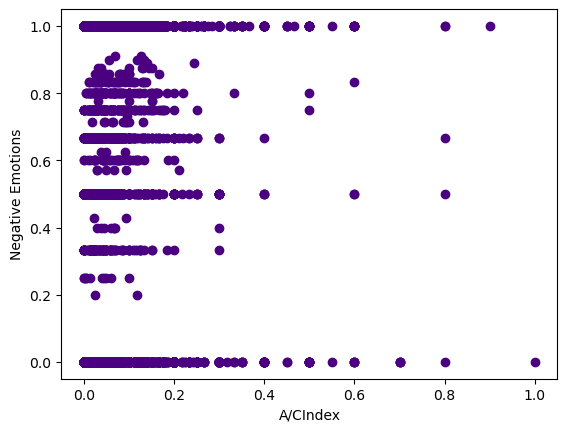

In [105]:
plt.xlabel("A/CIndex")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['A/CIndex'], y_train, color = 'indigo')
plt.show()

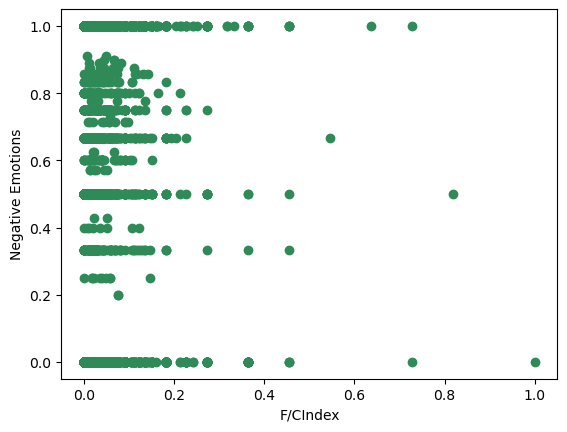

In [106]:
plt.xlabel("F/CIndex")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['F/CIndex'], y_train, color = 'seagreen')
plt.show()

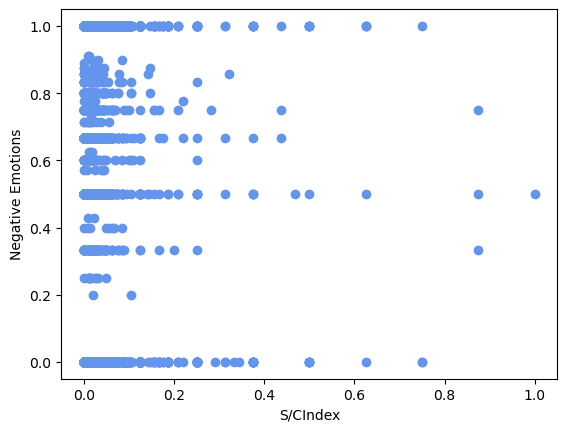

In [107]:
plt.xlabel("S/CIndex")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['S/CIndex'], y_train, color = 'cornflowerblue')
plt.show()

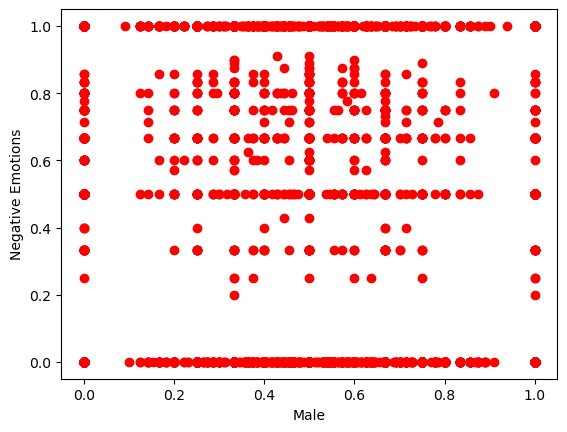

In [108]:
plt.xlabel("Male")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Male'], y_train, color = 'red')
plt.show()

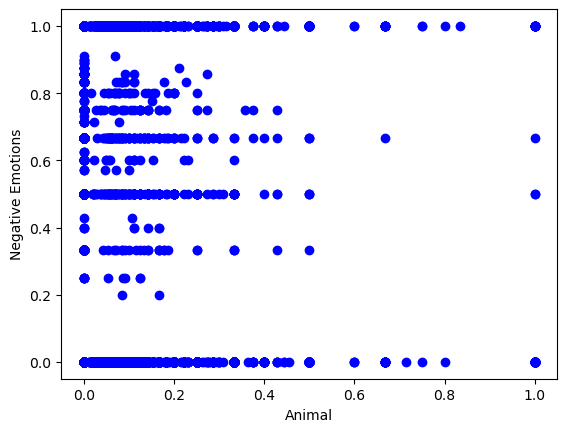

In [109]:
plt.xlabel("Animal")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Animal'], y_train, color = 'blue')
plt.show()

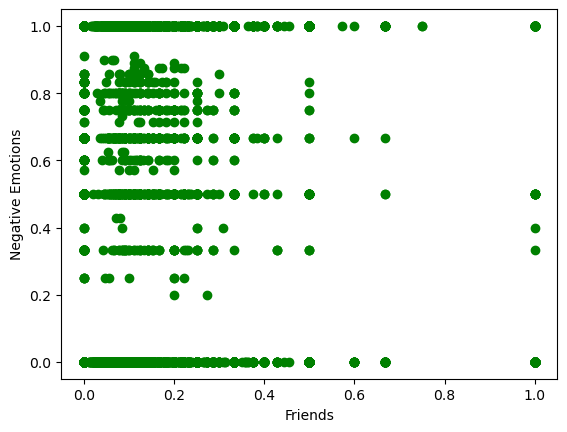

In [110]:
plt.xlabel("Friends")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Friends'], y_train, color = 'green')
plt.show()

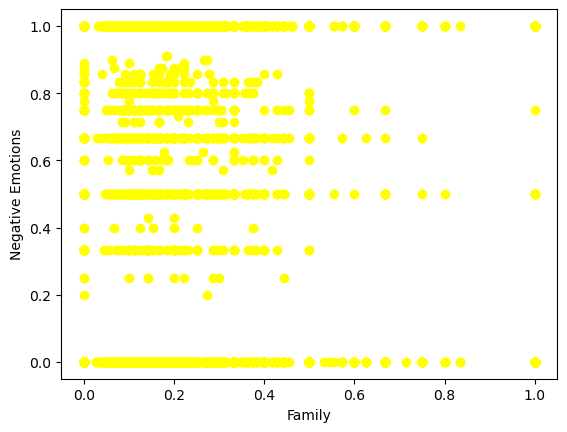

In [111]:
plt.xlabel("Family")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Family'], y_train, color = 'yellow')
plt.show()

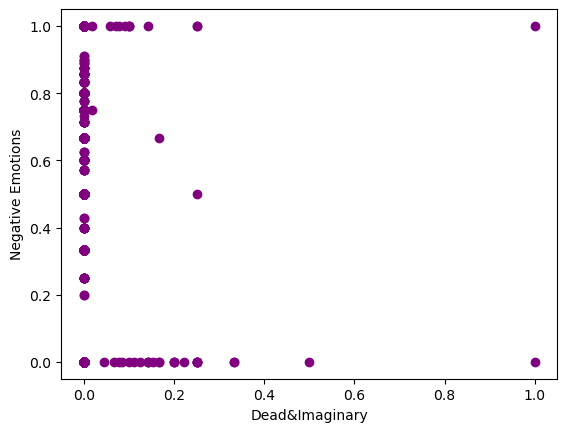

In [112]:
plt.xlabel("Dead&Imaginary")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Dead&Imaginary'], y_train, color = 'purple')
plt.show()

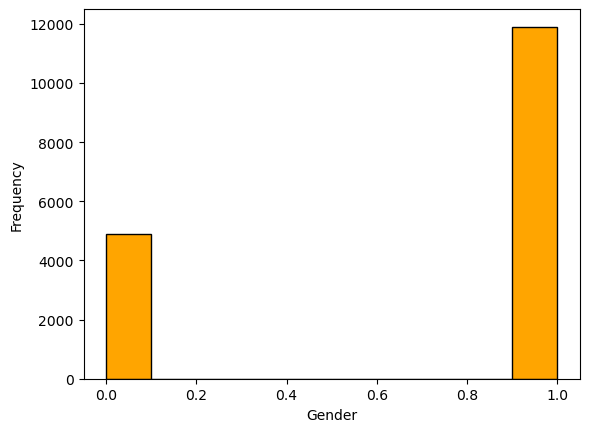

In [113]:
plt.hist(X_train['Gender'], bins=10, color='orange', edgecolor='black')  
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

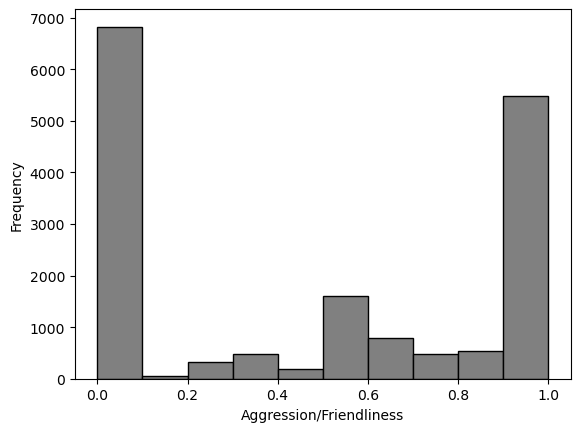

In [114]:
plt.hist(X_train['Aggression/Friendliness'], bins=10, color='gray', edgecolor='black')  
plt.xlabel('Aggression/Friendliness')
plt.ylabel('Frequency')
plt.show()

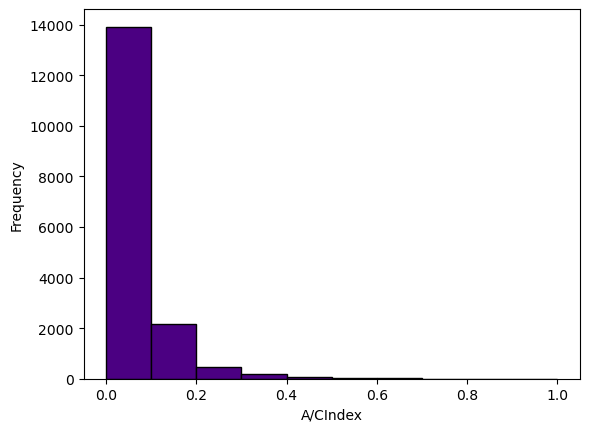

In [115]:
plt.hist(X_train['A/CIndex'], bins=10, color='indigo', edgecolor='black')  
plt.xlabel('A/CIndex')
plt.ylabel('Frequency')
plt.show()

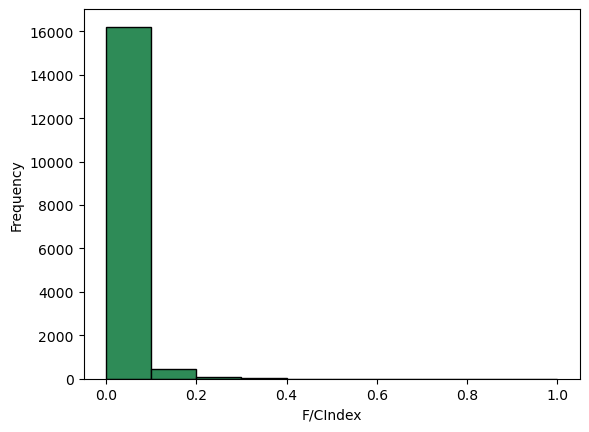

In [116]:
plt.hist(X_train['F/CIndex'], bins=10, color='seagreen', edgecolor='black')  
plt.xlabel('F/CIndex')
plt.ylabel('Frequency')
plt.show()

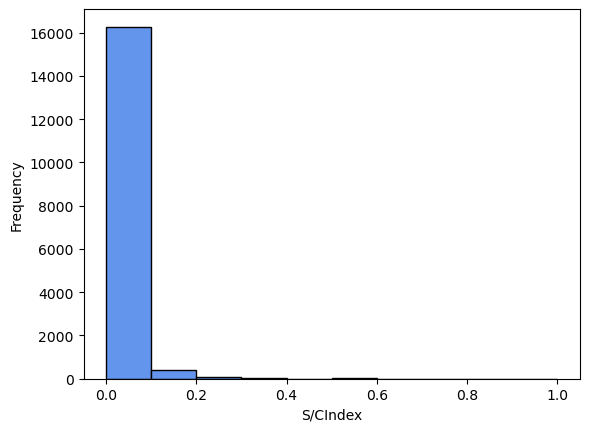

In [117]:
plt.hist(X_train['S/CIndex'], bins=10, color='cornflowerblue', edgecolor='black')  
plt.xlabel('S/CIndex')
plt.ylabel('Frequency')
plt.show()

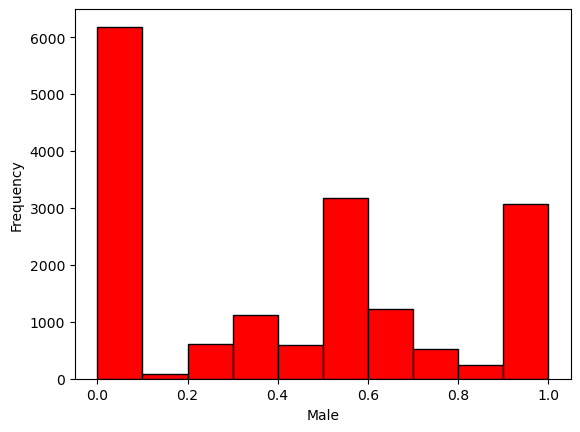

In [118]:
plt.hist(X_train['Male'], bins=10, color='red', edgecolor='black')  
plt.xlabel('Male')
plt.ylabel('Frequency')
plt.show()

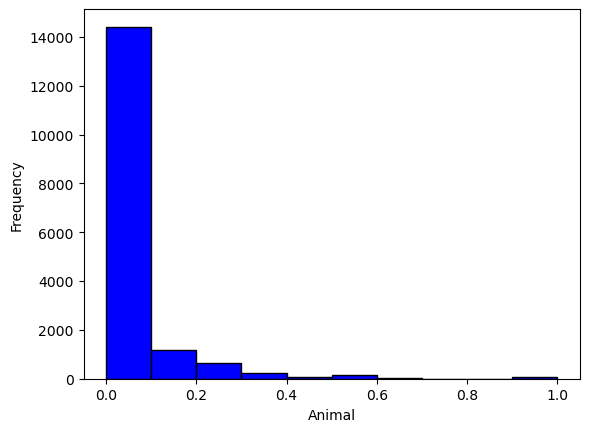

In [119]:

plt.hist(X_train['Animal'], bins=10, color='blue', edgecolor='black')  
plt.xlabel('Animal')
plt.ylabel('Frequency')
plt.show()

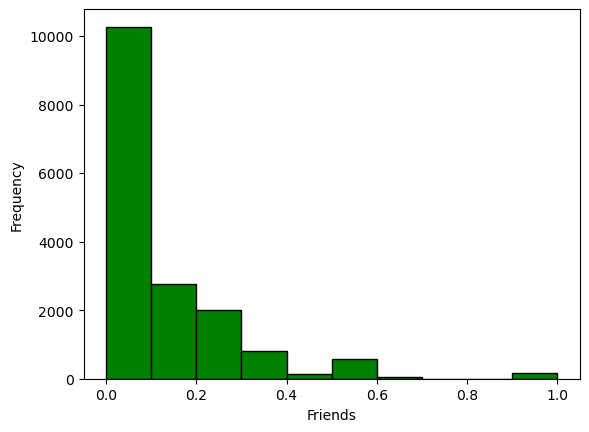

In [120]:
plt.hist(X_train['Friends'], bins=10, color='green', edgecolor='black') 
plt.xlabel('Friends')
plt.ylabel('Frequency')
plt.show()

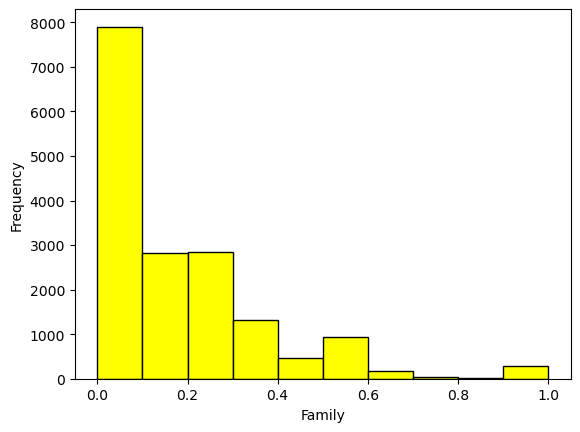

In [121]:
plt.hist(X_train['Family'], bins=10, color='yellow', edgecolor='black') 
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.show()


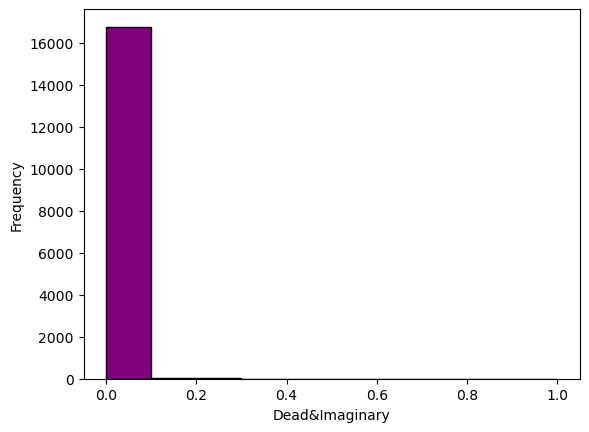

In [122]:
plt.hist(X_train['Dead&Imaginary'], bins=10, color='purple', edgecolor='black')  
plt.xlabel('Dead&Imaginary')
plt.ylabel('Frequency')
plt.show()

Checking for existing correlations between the attributes and target feature
Determining the degree to which they are correlated and which features have the highest correlation to each other & target feature

                           Gender      Male    Animal   Friends    Family  \
Gender                   1.000000 -0.022155 -0.017792 -0.105458  0.065204   
Male                    -0.022155  1.000000 -0.060983  0.231913  0.021379   
Animal                  -0.017792 -0.060983  1.000000 -0.013409 -0.019689   
Friends                 -0.105458  0.231913 -0.013409  1.000000 -0.128700   
Family                   0.065204  0.021379 -0.019689 -0.128700  1.000000   
Dead&Imaginary           0.006167 -0.015574 -0.005299 -0.011449 -0.008404   
Aggression/Friendliness -0.044520  0.024619  0.025333  0.001307 -0.022361   
A/CIndex                -0.027230 -0.052908  0.041126  0.039099 -0.008116   
F/CIndex                 0.096935 -0.012476 -0.036839  0.043381  0.025066   
S/CIndex                 0.015367  0.002929 -0.008512  0.045905 -0.001644   
NegativeEmotions         0.063773  0.017313 -0.004686  0.007380  0.025711   

                         Dead&Imaginary  Aggression/Friendliness  A/CIndex 

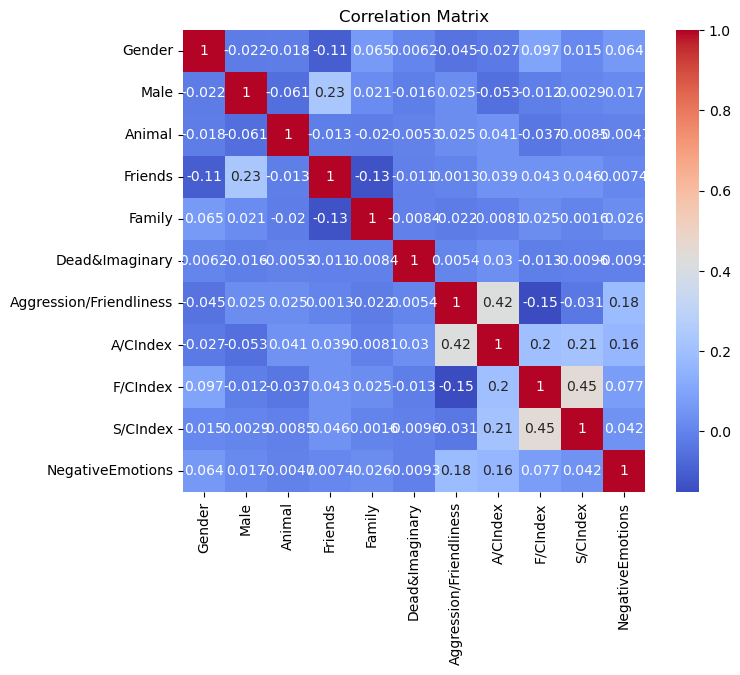

In [123]:
# Correlation matrix
selected_columns = X_train[['Gender', 'Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary', 
                            'Aggression/Friendliness', 'A/CIndex', 'F/CIndex', 'S/CIndex']]

selected_columns['NegativeEmotions'] = y_train
selected_columns.head(10)


# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



Exporting the processed training data frame to a csv file

In [124]:
training_df = X_train.copy()
training_df['NegativeEmotions'] = y_train
print(training_df.columns)
display(training_df.head())
training_df.to_csv("training_data.csv")

Index(['Gender', 'Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary',
       'Aggression/Friendliness', 'A/CIndex', 'F/CIndex', 'S/CIndex',
       'NegativeEmotions'],
      dtype='object')


,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417,0.0
8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889,1.0
9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000,1.0
17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000,0.0
16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857,1.0


Reflect changes on training set to test set

In [125]:
#Drop columns from test set to match the training set
X_test.drop(' dream_id', axis=1, inplace=True)
X_test.drop('dreamer', axis=1, inplace=True)
X_test.drop('description', axis=1, inplace=True)
X_test.drop('text_dream', axis=1, inplace=True)
X_test.drop('dream_language', axis=1, inplace=True)
X_test.drop('dream_date', axis=1, inplace=True)
X_test.drop('characters_code', axis=1, inplace=True)
X_test.drop('emotions_code', axis=1, inplace=True)
X_test.drop('aggression_code', axis=1, inplace=True)
X_test.drop('friendliness_code', axis=1, inplace=True)
X_test.drop('sexuality_code', axis=1, inplace=True)

#Scale columns
scaler = preprocessing.MinMaxScaler()
X_test['A/CIndex'] = scaler.fit_transform(X_test[['A/CIndex']])
X_test['F/CIndex'] = scaler.fit_transform(X_test[['F/CIndex']])
X_test['S/CIndex'] = scaler.fit_transform(X_test[['S/CIndex']])


In [126]:
#Make a copy of the files for later processing in subsequent files
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

In [127]:
!jupyter nbconvert --to script data_preprocessing.ipynb

[NbConvertApp] Converting notebook data_preprocessing.ipynb to script
[NbConvertApp] Writing 12081 bytes to data_preprocessing.py
